# QRS Complex Dectition Algorithm


## Acquiring the Data

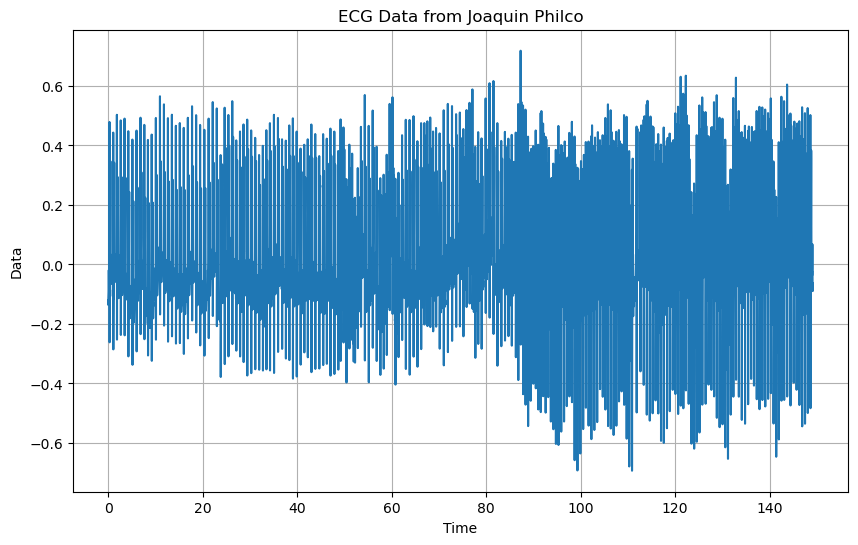

,sec,CH1,CH40,Unnamed: 3
0,0.000,-0.120850,0.0,NaN
1,0.001,-0.123596,0.0,NaN
2,0.002,-0.126343,0.0,NaN
3,0.003,-0.129395,0.0,NaN
4,0.004,-0.131836,0.0,NaN


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with comma as delimiter
df = pd.read_csv("lab5_Philco-L05.txt", delimiter=",")



# Get the time column
time = df.iloc[:, 0]

# Get the Channel data
data = df.iloc[:, 1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('ECG Data from Joaquin Philco')
plt.grid(True)
plt.show()

df.head()


## Removing the DC Component

In [45]:
df_subset = data[:3000]
time_subset = time[:3000]

# remove dc component
df_subset = df_subset - np.sum(df_subset)/len(df_subset)

## Labeling Data for Training

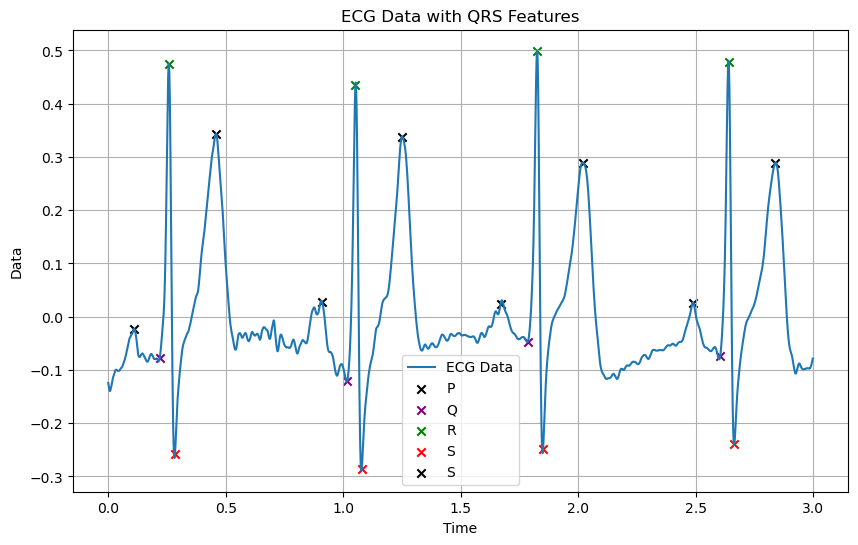

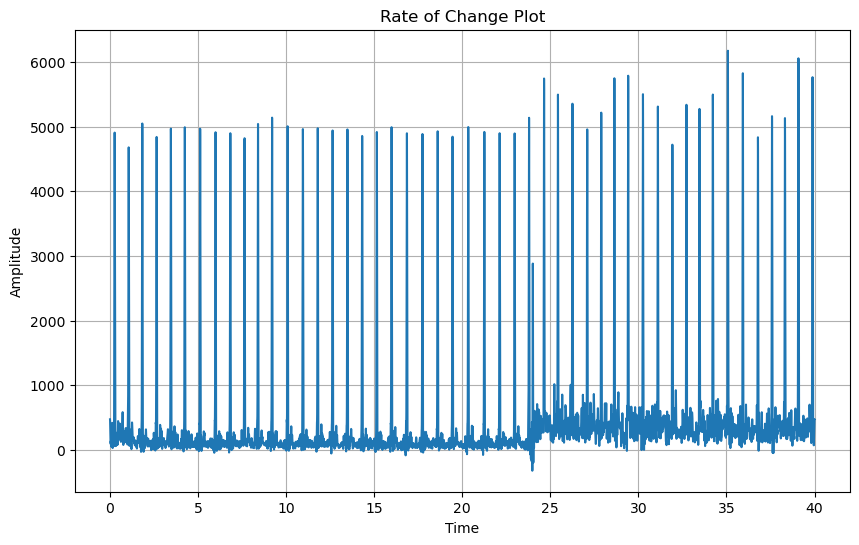

In [59]:
import numpy as np
from scipy.signal import find_peaks


p_indices = [110, 910, 1670, 2490]
q_indices = [219, 1018, 1785, 2605]
r_indices = [257, 1052, 1825, 2641]
s_indices = [284, 1079, 1851, 2663]
t_indices = [460, 1250, 2020, 2840]

# Plot the ECG signal
plt.figure(figsize=(10, 6))
plt.plot(time_subset, df_subset, label='ECG Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('ECG Data from Joaquin Philco')
plt.grid(True)


# Marking P Features
plt.scatter(time_subset[p_indices], df_subset[p_indices], color='black', marker='x', label='P')

# Marking Q Features
plt.scatter(time_subset[q_indices], df_subset[q_indices], color='purple', marker='x', label='Q')

# Marking R Features
plt.scatter(time_subset[r_indices], df_subset[r_indices], color='green', marker='x', label='R')

# Marking S Features
plt.scatter(time_subset[s_indices], df_subset[s_indices], color='red', marker='x', label='S')

# Marking T Features
plt.scatter(time_subset[t_indices], df_subset[t_indices], color='black', marker='x', label='S')

plt.xlabel('Time')
plt.ylabel('Data')
plt.title('ECG Data with QRS Features')
plt.legend()
plt.grid(True)
plt.show()


[x_data, y_data] = rate_of_change(time[:40000], data[:40000])

## Rate of Change Function
This function gets the first and second derivative of the original given signal and adds their absolute components together, to take a look at the rate of change of the data. The QRS component of each beat can be identified by the largest peakls in the plot. 

The function steps:
--> Gets first derivative
--> Gets second derivative
--> Adds absolute values of first and second derivative
--> Transnforms to frequency domain
--> applies a low pass filter to the data
--> return to time domain
--> plots the rate of change
--> returns both x and y components of the rate of change plot

In [57]:
def rate_of_change(signal_x, signal_y):

    # remove dc component
    signal_y = signal_y - np.sum(signal_y)/len(signal_y)

    # Compute the first derivative
    first_derivative = np.gradient(signal_y, signal_x)

    # Compute the second derivative
    second_derivative = np.gradient(first_derivative, signal_x)

    roc_data = abs(first_derivative) + abs(second_derivative)

    # Find the frequency domain components
    fft_result = np.fft.fft(roc_data)

    # Compute the frequencies corresponding to the FFT result
    n = len(roc_data)
    freq = np.fft.fftfreq(n, d=(signal_x[1] - signal_x[0]))

    # Define the cutoff frequency for the low-pass filter
    cutoff_freq = 25  # Adjust this value according to your requirements

    # Create the low-pass filter
    lowpass_filter = np.zeros_like(freq)
    lowpass_filter[np.abs(freq) <= cutoff_freq] = 1

    # Apply the low-pass filter to the FFT result
    filtered_fft_result = fft_result * lowpass_filter

    # Compute the inverse FFT (return to time domain)
    ifft_result = np.fft.ifft(filtered_fft_result)

    # Plot the rate of change plot
    plt.figure(figsize=(10, 6))
    plt.plot(signal_x, np.real(ifft_result))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Rate of Change Plot')
    plt.grid(True)
    plt.show()

    return signal_x, np.real(ifft_result)